In [14]:
import os
import json
from PIL import Image, ImageDraw
import base64
import io

# Verzeichnisse definieren
input_folder = "/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/abnormal/NIO-Nahaufnahme"  # Pfad zum Ordner mit den JSON-Dateien
output_folder = "/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data/ground_truth/abnormal"  # Pfad zum Ordner für die Masken

# Erstelle den Ausgabeordner, falls er nicht existiert
os.makedirs(output_folder, exist_ok=True)

# Durchlaufe alle Dateien im Eingabeordner
for file_name in os.listdir(input_folder):
    if file_name.endswith(".json"):  # Nur JSON-Dateien verarbeiten
        input_path = os.path.join(input_folder, file_name)
        
        # JSON-Datei einlesen
        with open(input_path, 'r') as f:
            data = json.load(f)

        # Bildgröße aus JSON extrahieren
        image_data = data["imageData"]
        image = Image.open(io.BytesIO(base64.b64decode(image_data)))
        width, height = image.size

        # Erstelle eine leere schwarze Maske
        mask = Image.new('RGB', (width, height), (0, 0, 0))
        draw = ImageDraw.Draw(mask)

        # Punkte aus der JSON-Datei extrahieren und die Polygonmaske gelb füllen
        shapes = data["shapes"]
        for shape in shapes:
            if shape["shape_type"] == "polygon":
                points = shape["points"]
                polygon = [(x, y) for x, y in points]
                # Zeichne das Polygon in Gelb
                draw.polygon(polygon, fill=(255, 255, 0))

        # Speichere die Maske
        output_file_name = f"{os.path.splitext(file_name)[0]}_mask.png"
        output_path = os.path.join(output_folder, output_file_name)
        mask.save(output_path)

print("Masken wurden erfolgreich erstellt und gespeichert.")

Masken wurden erfolgreich erstellt und gespeichert.


In [2]:
import os
from PIL import Image

# Eingabe- und Ausgabeordner definieren
input_folder = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/Konsulation/camera'
output_folder = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/Konsulation/camera_resized'

# Ausgabeordner erstellen, falls er nicht existiert
os.makedirs(output_folder, exist_ok=True)

# Maximal erlaubte Dateigröße in Bytes (1 MB = 1 * 1024 * 1024)
max_size = 1 * 512 * 512

# Durchlaufe alle Dateien im Eingabeordner
for file_name in os.listdir(input_folder):
    input_path = os.path.join(input_folder, file_name)
    
    # Nur Bilddateien verarbeiten
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        with Image.open(input_path) as img:
            # Schrittweise die Qualität reduzieren, um die Dateigröße zu verringern
            quality = 95  # Startqualität
            while True:
                # Bild im Speicher speichern, um die Dateigröße zu prüfen
                temp_file = os.path.join(output_folder, file_name)
                img.save(temp_file, optimize=True, quality=quality)

                # Dateigröße prüfen
                if os.path.getsize(temp_file) <= max_size or quality <= 10:
                    break
                quality -= 5  # Reduziere die Qualität, wenn die Größe zu groß ist

        print(f"Verarbeitet: {file_name} -> Größe: {os.path.getsize(temp_file)} Bytes")

print(f"Alle Bilder wurden verkleinert und in '{output_folder}' gespeichert.")

Verarbeitet: DSC02847.JPG -> Größe: 278551 Bytes
Verarbeitet: DSC02853.JPG -> Größe: 208946 Bytes
Verarbeitet: DSC02852.JPG -> Größe: 274184 Bytes
Verarbeitet: DSC02846.JPG -> Größe: 252416 Bytes
Verarbeitet: DSC02850.JPG -> Größe: 280451 Bytes
Verarbeitet: DSC02844.JPG -> Größe: 217909 Bytes
Verarbeitet: DSC02845.JPG -> Größe: 228873 Bytes
Verarbeitet: DSC02851.JPG -> Größe: 229154 Bytes
Verarbeitet: DSC02869.JPG -> Größe: 292957 Bytes
Verarbeitet: DSC02855.JPG -> Größe: 285380 Bytes
Verarbeitet: DSC02841.JPG -> Größe: 236896 Bytes
Verarbeitet: DSC02840.JPG -> Größe: 251690 Bytes
Verarbeitet: DSC02854.JPG -> Größe: 220077 Bytes
Verarbeitet: DSC02868.JPG -> Größe: 314200 Bytes
Verarbeitet: DSC02871_1.JPG -> Größe: 245592 Bytes
Verarbeitet: DSC02842.JPG -> Größe: 311470 Bytes
Verarbeitet: DSC02856.JPG -> Größe: 212115 Bytes
Verarbeitet: DSC02857.JPG -> Größe: 277038 Bytes
Verarbeitet: DSC02843.JPG -> Größe: 297156 Bytes
Verarbeitet: DSC02839.JPG -> Größe: 243836 Bytes
Verarbeitet: DSC02

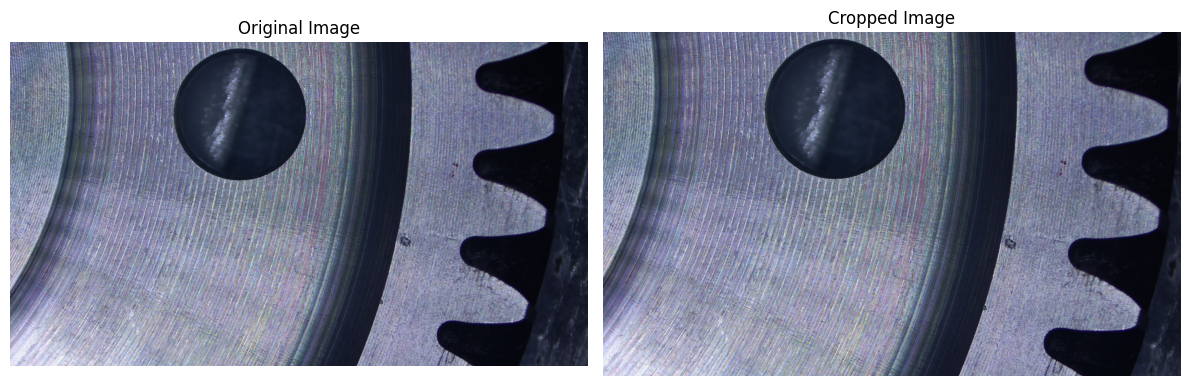

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

# Pfad zum Bild
image_path = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/NIO-Nahaufnahme/PIC000350.jpg'

# Anzahl der Pixel, die links und rechts weggeschnitten werden sollen
crop_left = 50  # Pixel links abschneiden
crop_right = 100  # Pixel rechts abschneiden

# Bild laden
image = Image.open(image_path)

# Ursprüngliche Bildgröße
width, height = image.size

# Neue Ränder definieren
left = crop_left
upper = 0
right = width - crop_right
lower = height

# Bild zuschneiden
cropped_image = image.crop((left, upper, right, lower))

# Originales und zugeschnittenes Bild plotten
plt.figure(figsize=(12, 6))

# Originalbild anzeigen
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

# Zugeschnittenes Bild anzeigen
plt.subplot(1, 2, 2)
plt.title("Cropped Image")
plt.imshow(cropped_image)
plt.axis("off")

plt.tight_layout()
plt.show()


In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Pfad zum Bild
image_path = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_raw/test/normal/PIC000379.jpg'
# Zielverhältnis von Breite zu Höhe
target_ratio = 1.5

# Anzahl der Pixel, die rechts weggeschnitten werden sollen
crop_right = 100  # Pixel rechts abschneiden

# Bild laden
image = Image.open(image_path)

# Ursprüngliche Bildgröße
width, height = image.size

# Berechnung der linken Abschneidegrenze für das gewünschte Verhältnis
new_width = int(height * target_ratio)
if new_width + crop_right > width:
    raise ValueError("Das gewünschte Verhältnis kann mit der aktuellen Bildbreite nicht erreicht werden.")

crop_left = width - new_width - crop_right

# Neue Ränder definieren
left = crop_left
upper = 0
right = width - crop_right
lower = height

# Bild zuschneiden
cropped_image = image.crop((left, upper, right, lower))

# Das zugeschnittene Bild in 6 Quadrate teilen
cropped_width, cropped_height = cropped_image.size
square_size = min(cropped_width // 2, cropped_height // 1)
squares = []
for row in range(1):
    for col in range(2):
        left = col * square_size
        upper = row * square_size
        right = left + square_size
        lower = upper + square_size
        square = cropped_image.crop((left, upper, right, lower))
        squares.append(square)

# Die Quadrate mit Abständen zu einem Bild zusammensetzen
spacing = 10  # Abstand zwischen den Quadraten
new_image_width = 2 * square_size + 1 * spacing
new_image_height = 1 * square_size + spacing
new_image = Image.new("RGB", (new_image_width, new_image_height), (255, 255, 255))

# Quadrate in das neue Bild einfügen
for row in range(2):
    for col in range(3):
        x = col * (square_size + spacing)
        y = row * (square_size + spacing)
        new_image.paste(squares[row * 2 + col], (x, y))

# Originales, zugeschnittenes und zusammengesetztes Bild plotten
plt.figure(figsize=(12, 8))

# Originalbild anzeigen
plt.subplot(1, 3, 1)
plt.title(f"Original Image\nSize: {width}x{height} pixels")
plt.imshow(image)
plt.axis("off")

# Zugeschnittenes Bild anzeigen
plt.subplot(1, 3, 2)
plt.title(f"Cropped Image\nSize: {cropped_width}x{cropped_height} pixels")
plt.imshow(cropped_image)
plt.axis("off")

# Zusammengesetztes Bild anzeigen
plt.subplot(1, 3, 3)
plt.title(f"Reconstructed Image\nSize: {new_image_width}x{new_image_height} pixels")
plt.imshow(new_image)
plt.axis("off")

plt.tight_layout()
plt.show()


IndexError: list index out of range

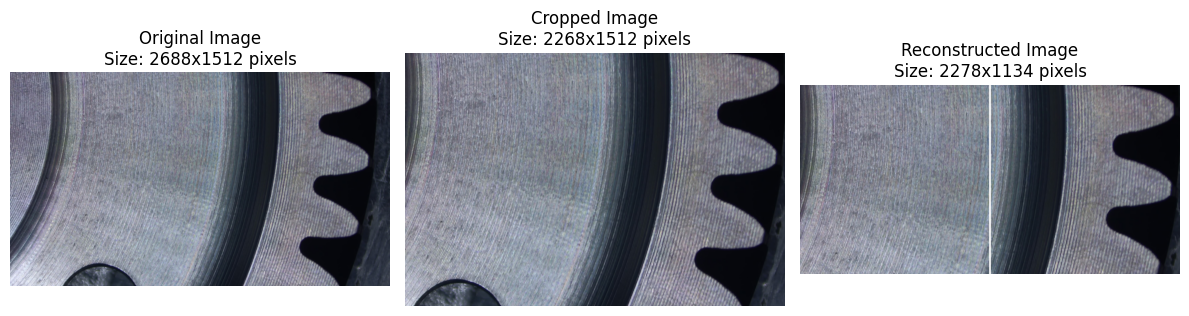

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Pfad zum Bild
image_path = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_raw/test/normal/PIC000379.jpg'
# Zielverhältnis von Breite zu Höhe
target_ratio = 1.5

# Anzahl der Pixel, die rechts weggeschnitten werden sollen
crop_right = 100  # Pixel rechts abschneiden

# Bild laden
image = Image.open(image_path)

# Ursprüngliche Bildgröße
width, height = image.size

# Berechnung der linken Abschneidegrenze für das gewünschte Verhältnis
new_width = int(height * target_ratio)
if new_width + crop_right > width:
    raise ValueError("Das gewünschte Verhältnis kann mit der aktuellen Bildbreite nicht erreicht werden.")

crop_left = width - new_width - crop_right

# Neue Ränder definieren
left = crop_left
upper = 0
right = width - crop_right
lower = height

# Bild zuschneiden
cropped_image = image.crop((left, upper, right, lower))

# Das zugeschnittene Bild in 2 Quadrate teilen
cropped_width, cropped_height = cropped_image.size
square_size = min(cropped_width // 2, cropped_height)  # Größe der Quadrate bestimmen
squares = []
for col in range(2):
    left = col * square_size
    upper = 0
    right = left + square_size
    lower = upper + square_size
    square = cropped_image.crop((left, upper, right, lower))
    squares.append(square)

# Die Quadrate mit Abständen zu einem Bild zusammensetzen
spacing = 10  # Abstand zwischen den Quadraten
new_image_width = 2 * square_size + spacing
new_image_height = square_size
new_image = Image.new("RGB", (new_image_width, new_image_height), (255, 255, 255))

# Quadrate in das neue Bild einfügen
for col in range(2):
    x = col * (square_size + spacing)
    y = 0
    new_image.paste(squares[col], (x, y))

# Originales, zugeschnittenes und zusammengesetztes Bild plotten
plt.figure(figsize=(12, 8))

# Originalbild anzeigen
plt.subplot(1, 3, 1)
plt.title(f"Original Image\nSize: {width}x{height} pixels")
plt.imshow(image)
plt.axis("off")

# Zugeschnittenes Bild anzeigen
plt.subplot(1, 3, 2)
plt.title(f"Cropped Image\nSize: {cropped_width}x{cropped_height} pixels")
plt.imshow(cropped_image)
plt.axis("off")

# Zusammengesetztes Bild anzeigen
plt.subplot(1, 3, 3)
plt.title(f"Reconstructed Image\nSize: {new_image_width}x{new_image_height} pixels")
plt.imshow(new_image)
plt.axis("off")

plt.tight_layout()
plt.show()


In [16]:
import os
import shutil
import random

# Pfade der Ordner
source_folder = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/normal/IO-Nahaufnahme'
train_folder = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data/train/normal'
test_folder = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data/test/normal'

# Sicherstellen, dass die Zielordner existieren
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Alle Dateien im Quellordner auflisten
all_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]

# 52 Dateien zufällig auswählen
random.seed(42)  # Für reproduzierbare Ergebnisse
test_files = random.sample(all_files, 52)

# Dateien für den Trainingsordner (alle außer den Testdateien)
train_files = [f for f in all_files if f not in test_files]

# Dateien in die entsprechenden Ordner kopieren
for file in test_files:
    shutil.copy(os.path.join(source_folder, file), os.path.join(test_folder, file))

for file in train_files:
    shutil.copy(os.path.join(source_folder, file), os.path.join(train_folder, file))

print(f"{len(train_files)} Dateien wurden in den Trainingsordner kopiert.")
print(f"{len(test_files)} Dateien wurden in den Testordner kopiert.")

259 Dateien wurden in den Trainingsordner kopiert.
52 Dateien wurden in den Testordner kopiert.


In [24]:
import os
from PIL import Image

# Pfad zum Ordner mit den Originalbildern
source_folder = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_raw/train/normal'

# Zielordner für die Quadrate
target_folder_1 = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_1/train/normal'
target_folder_2 = '/Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_2/train/normal'

# Zielverhältnis von Breite zu Höhe
target_ratio = 1.5
# Anzahl der Pixel, die rechts weggeschnitten werden sollen
crop_right = 100  # Pixel rechts abschneiden

# Erstelle Zielordner, falls sie nicht existieren
os.makedirs(target_folder_1, exist_ok=True)
os.makedirs(target_folder_2, exist_ok=True)

# Durch alle Bilder im Quellordner iterieren
for filename in os.listdir(source_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Unterstützte Bildformate
        image_path = os.path.join(source_folder, filename)
        try:
            # Bild laden
            image = Image.open(image_path)
            width, height = image.size

            # Berechnung der linken Abschneidegrenze für das gewünschte Verhältnis
            new_width = int(height * target_ratio)
            if new_width + crop_right > width:
                raise ValueError(f"Das gewünschte Verhältnis kann für {filename} nicht erreicht werden.")

            crop_left = width - new_width - crop_right

            # Bild zuschneiden
            cropped_image = image.crop((crop_left, 0, width - crop_right, height))

            # Das zugeschnittene Bild in 2 Quadrate teilen
            cropped_width, cropped_height = cropped_image.size
            square_size = min(cropped_width // 2, cropped_height)  # Größe der Quadrate bestimmen
            squares = []
            for col in range(2):
                left = col * square_size
                upper = 0
                right = left + square_size
                lower = upper + square_size
                square = cropped_image.crop((left, upper, right, lower))
                squares.append(square)

            # Speicherorte für die Quadrate definieren
            square_1_path = os.path.join(target_folder_1, f"{os.path.splitext(filename)[0]}_square1.jpg")
            square_2_path = os.path.join(target_folder_2, f"{os.path.splitext(filename)[0]}_square2.jpg")

            # Quadrate speichern
            squares[0].save(square_1_path)
            squares[1].save(square_2_path)

            print(f"Verarbeitet: {filename} -> Quadrat 1: {square_1_path}, Quadrat 2: {square_2_path}")

        except Exception as e:
            print(f"Fehler bei {filename}: {e}")

Verarbeitet: PIC000715.jpg -> Quadrat 1: /Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_1/train/normal/PIC000715_square1.jpg, Quadrat 2: /Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_2/train/normal/PIC000715_square2.jpg
Verarbeitet: PIC000701.jpg -> Quadrat 1: /Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_1/train/normal/PIC000701_square1.jpg, Quadrat 2: /Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_2/train/normal/PIC000701_square2.jpg
Verarbeitet: PIC000729.jpg -> Quadrat 1: /Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_1/train/normal/PIC000729_square1.jpg, Quadrat 2: /Users/karl/Library/CloudStorage/OneDrive-Persönlich/Uni/Master/3. Semester/Objekterkennung/data_two/model_2/train/

/var/folders/fk/_3pbzp8d50n0whfkggr5rydh0000gn/T/ipykernel_27582/2682602646.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(image_auroc, pixel_auroc, s=sizes, alpha=0.7, edgecolors='k', cmap='viridis')


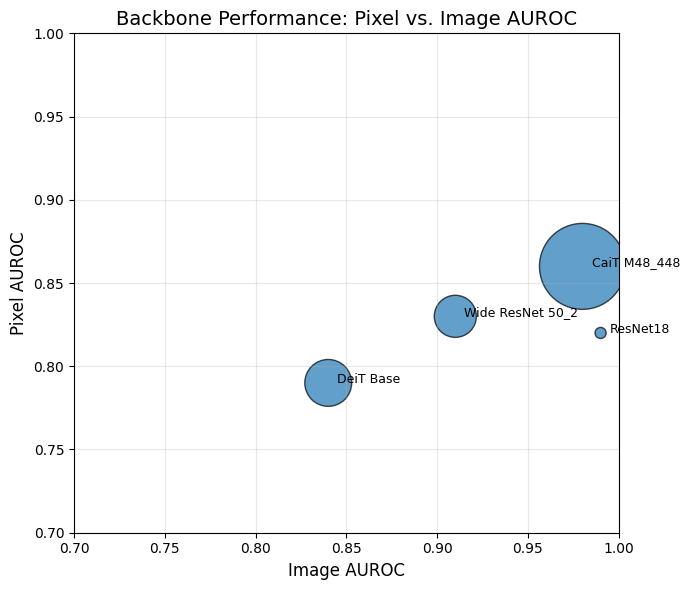

In [32]:
import matplotlib.pyplot as plt

# Daten
backbones = ['ResNet18', 'Wide ResNet 50_2', 'CaiT M48_448', 'DeiT Base']
pixel_auroc = [0.82, 0.83, 0.86, 0.79]
image_auroc = [0.99, 0.91, 0.98, 0.84]
params = [6.4, 91.9, 383, 114]  # Millionen Parameter

# Punktgrößen skalieren
sizes = [p * 10 for p in params]  # Skalierung für bessere Lesbarkeit

# Plot erstellen
plt.figure(figsize=(7, 6))
scatter = plt.scatter(image_auroc, pixel_auroc, s=sizes, alpha=0.7, edgecolors='k', cmap='viridis')

# Beschriftung hinzufügen
for i, backbone in enumerate(backbones):
    plt.text(image_auroc[i] + 0.005, pixel_auroc[i], backbone, fontsize=9)

# Achsentitel und Layout
plt.xlabel('Image AUROC', fontsize=12)
plt.ylabel('Pixel AUROC', fontsize=12)
plt.title('Backbone Performance: Pixel vs. Image AUROC', fontsize=14)
plt.grid(alpha=0.3)

# Achsen bei 0 beginnen
plt.xlim(0.7, 1)  # X-Achse von 0 bis 1
plt.ylim(0.7, 1)  # Y-Achse von 0 bis 1

plt.tight_layout()
plt.show()

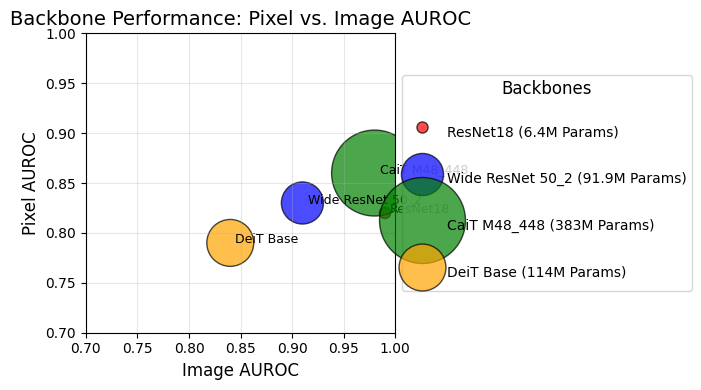

In [36]:
import matplotlib.pyplot as plt

# Daten
backbones = ['ResNet18', 'Wide ResNet 50_2', 'CaiT M48_448', 'DeiT Base']
pixel_auroc = [0.82, 0.83, 0.86, 0.79]
image_auroc = [0.99, 0.91, 0.98, 0.84]
params = [6.4, 91.9, 383, 114]  # Millionen Parameter
colors = ['red', 'blue', 'green', 'orange']  # Farben für die Backbones

# Punktgrößen skalieren
sizes = [p * 10 for p in params]  # Skalierung für bessere Lesbarkeit

# Plot erstellen
plt.figure(figsize=(7, 4))
scatter = plt.scatter(image_auroc, pixel_auroc, s=sizes, c=colors, alpha=0.7, edgecolors='k')

# Beschriftung hinzufügen
for i, backbone in enumerate(backbones):
    plt.text(image_auroc[i] + 0.005, pixel_auroc[i], backbone, fontsize=9)

# Legende erstellen
for i, backbone in enumerate(backbones):
    plt.scatter([], [], s=sizes[i], c=colors[i], alpha=0.7, edgecolors='k', label=f"{backbone} ({params[i]}M Params)")

# Legende mit größeren Zeilenabständen
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1, 0.5), 
    fontsize=10, 
    title="Backbones", 
    title_fontsize=12, 
    handleheight=2.5,  # Vergrößert die Zeilenabstände
    labelspacing=1.5   # Zusätzlicher Abstand zwischen den Labels
)

# Achsentitel und Layout
plt.xlabel('Image AUROC', fontsize=12)
plt.ylabel('Pixel AUROC', fontsize=12)
plt.title('Backbone Performance: Pixel vs. Image AUROC', fontsize=14)
plt.grid(alpha=0.3)

# Achsenbereich
plt.xlim(0.7, 1)  # X-Achse von 0 bis 1
plt.ylim(0.7, 1)  # Y-Achse von 0 bis 1

plt.tight_layout()
plt.show()



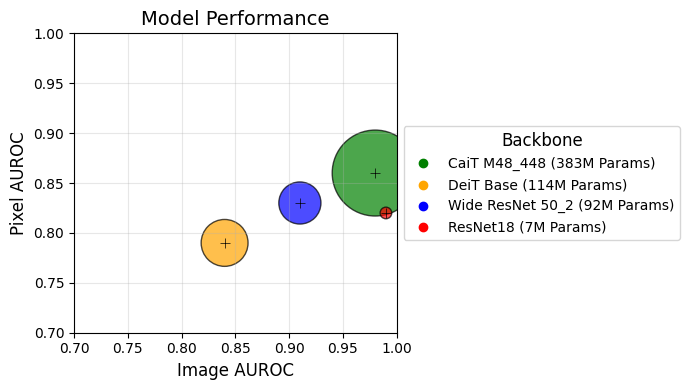

In [2]:
import matplotlib.pyplot as plt

# Daten
backbones = ['ResNet18', 'Wide ResNet 50_2', 'CaiT M48_448', 'DeiT Base']
pixel_auroc = [0.82, 0.83, 0.86, 0.79]
image_auroc = [0.99, 0.91, 0.98, 0.84]
params = [7, 92, 383, 114]  # Millionen Parameter
colors = ['red', 'blue', 'green', 'orange']  # Farben für die Backbones

# Punktgrößen skalieren
sizes = [p * 10 for p in params]  # Skalierung für bessere Lesbarkeit

# Daten nach Parameteranzahl sortieren (absteigend)
sorted_indices = sorted(range(len(params)), key=lambda i: params[i], reverse=True)
backbones = [backbones[i] for i in sorted_indices]
pixel_auroc = [pixel_auroc[i] for i in sorted_indices]
image_auroc = [image_auroc[i] for i in sorted_indices]
params = [params[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]
sizes = [sizes[i] for i in sorted_indices]

# Plot erstellen
plt.figure(figsize=(7, 4))
scatter = plt.scatter(image_auroc, pixel_auroc, s=sizes, c=colors, alpha=0.7, edgecolors='k')
plt.scatter(image_auroc, pixel_auroc, color='black', marker='+', s=50, linewidths=0.5)

# Legende erstellen
for i, backbone in enumerate(backbones):
    plt.plot([], [], marker='o', color=colors[i], linestyle='None', label=f"{backbone} ({params[i]}M Params)")

# Legende mit größeren Zeilenabständen
plt.legend(
    loc='center left', 
    bbox_to_anchor=(1, 0.5), 
    fontsize=10, 
    title="Backbone", 
    title_fontsize=12, 
    handleheight=0.5,  # Vergrößert die Zeilenabstände
    labelspacing=0.5   # Zusätzlicher Abstand zwischen den Labels
)

# Achsentitel und Layout
plt.xlabel('Image AUROC', fontsize=12)
plt.ylabel('Pixel AUROC', fontsize=12)
plt.title('Model Performance', fontsize=14)
plt.grid(alpha=0.3)

# Achsenbereich
plt.xlim(0.7, 1)  # X-Achse von 0 bis 1
plt.ylim(0.7, 1)  # Y-Achse von 0 bis 1

plt.tight_layout()
plt.show()